In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('Uber_Request_Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


Knowing the dta types of a table

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Checking for null values

In [56]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [57]:
#Format the date on request timestamp and drop timestamp columns
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [59]:
#Spliting the columns Request timestamp and Drop timestamp into 
#Request day,Request time,Drop day,Drop time for further analysis


df['Request day']=df['Request timestamp'].dt.date   #(dt.-year,month,date,hour,time)
df['Request time']=df['Request timestamp'].dt.time
df['Drop day']=df['Drop timestamp'].dt.date
df['Drop time']=df['Drop timestamp'].dt.time


In [60]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request day,Request time,Drop day,Drop time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47


In [61]:
#What is the average time taken for a trip (difference between Request timestamp and Drop timestamp)?
df['Diff timestamp']=(df['Drop timestamp']-df['Request timestamp'])
df['Diff timestamp'].mean()

Timedelta('-1 days +13:14:01.893323914')

In [63]:
# suppoce if u r treating for null values use median.
df['Diff timestamp'].fillna(df['Diff timestamp'].median())

0      0 days 01:09:00
1      0 days 00:50:00
2      0 days 00:41:00
3      0 days 00:55:00
4      0 days 00:52:31
             ...      
6740   0 days 00:52:05
6741   0 days 00:52:05
6742   0 days 00:52:05
6743   0 days 00:52:05
6744   0 days 00:52:05
Name: Diff timestamp, Length: 6745, dtype: timedelta64[ns]

In [64]:
#Grouping the data by status and counting the number of request ids for each status type.
pd.pivot_table(df,index='Status',values='Request id',aggfunc='count')

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


In [65]:
#Grouping driver id and status type to look at the performance of drivers
pd.pivot_table(df,index=['Status','Driver id'])

C:\Users\jayan\AppData\Local\Temp\ipykernel_15724\645878798.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=['Status','Driver id'])


Request id
Status         Driver id             
Cancelled      1.0        4709.750000
               2.0        3906.750000
               3.0        1716.000000
               4.0        2924.400000
               5.0        3763.000000
...                               ...
Trip Completed 296.0      2564.700000
               297.0      2855.363636
               298.0      4098.727273
               299.0      3757.142857
               300.0      3468.400000

[595 rows x 1 columns]

In [66]:
#Finding the total trips completed to total trip request
print('Total trips completed=',df[df['Status']=='Trip Completed'].shape[0])

Total trips completed= 2831


In [67]:
#Trip request completion percentage
print('Trip completion percentage=',a/df.shape[0]*100)

Trip completion percentage= Pickup point
Airport    48.00593
City       51.99407
Name: Request id, dtype: float64


In [68]:
# During which hours of the day are the most requests made?
df['Request time'].value_counts().head(3)
#looks like most of the request is mmade during morning and evening

19:02:00    9
09:40:00    9
19:17:00    9
Name: Request time, dtype: int64

In [69]:
#Which driver has the highest number of completed trips?
a=df[df['Status']=='Trip Completed']
b=a.groupby(by='Driver id')['Status'].count()
b.idxmax(),b.max()

(22.0, 16)

In [70]:
#How many trips were cancelled by each driver?
a=df[df['Status']=='Cancelled']
a.groupby(by='Driver id')['Status'].value_counts()


Driver id  Status   
1.0        Cancelled    4
2.0        Cancelled    4
3.0        Cancelled    4
4.0        Cancelled    5
5.0        Cancelled    2
                       ..
296.0      Cancelled    4
297.0      Cancelled    4
298.0      Cancelled    4
299.0      Cancelled    5
300.0      Cancelled    1
Name: Status, Length: 295, dtype: int64

<Axes: ylabel='Request id'>

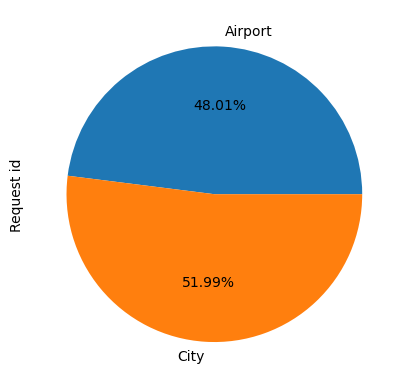

In [71]:
#The distribution of requests among different pickup points?
a=df.groupby(by='Pickup point')['Request id'].count()
a.plot(kind='pie',autopct='%.2f%%')

In [72]:
#Are there specific days of the week when the demand is higher?
df['Request day']=pd.to_datetime(df['Request day'])
df['Request day'].dt.day_name().mode()
#Wednesday has the highest number of requests

0    Wednesday
Name: Request day, dtype: object